# Introduction to Control Systems

Hello everyone, in this occasion I would like to share my notebook that I used to create the poster for this year EuroPython.

Don't forget to follow me on github then :)

Install the require library first, if you already installed it then skip to the next section.

In [187]:
!pip install control
!pip install slycot
!pip install scipy
!pip install numpy
!pip install matplotlib

Caveat: sorry for the array mess because the python control systems library always print that kind of array and I still try to figure out the way to get rid of it.

# Tutorial on Control Systems Design with Python

The LTI (Linear Time-Invariant) were assumed to be used here because nonlinear or other complex systems are difficult to design and need a more advanced understanding of the control systems field.

## Library Importing 

First of all, we need to import several essential libraries for designing the control systems, as listed below

In [ ]:
import control # This is python control library (https://python-control.readthedocs.io/en/latest/intro.html)
import matplotlib.pyplot as plt
import numpy as np
import scipy
from control.matlab import * # To import matlab like function in designing control systems

## Defining Transfer Function

Let's assume we have an arbitrary transfer function equal to

Continuous Transfer Function

\begin{align}
\frac{s}{s^2 + 2s + 6}
\end{align}

Discrete Transfer Function

\begin{align}
\frac{z}{z^2 + 2z + 6}
\end{align}

Import the Function from Python Control

In [ ]:
from control import TransferFunction, pole, zero # Transfer Function function import

### Python Control Function

In [ ]:
# Continuous Time Systems
s = TransferFunction.s
sysc = s / (s**2 + 2*s + 6)
# Discrete Time Systems
z = TransferFunction.z
sysd = z / (z**2 + 2*z + 6)

### MATLAB like Function

In [ ]:
# Continuous Time Systems
s = tf('s')
sysc = s/(s**2 + 2*s + 6)
# Discrete Time Systems
z = tf('z')
sysd = z / (z**2 + 2*z + 6)

### Stability Check

In order to get the specified output, the various parameters of the system must be controlled. Along with this, the system must be stable enough so that the output must not get affected by the undesirable variations in the parameter of the system or disturbances.

Thus we can say that a stable system is designed so as to get the desired response of the system without any intolerable variation with the changes in the system parameters.

Source: https://electronicscoach.com/stability-of-control-system.html

![alt text](https://flylib.com/books/2/729/1/html/2/images/0131089897/graphics/06fig14.gif)

Source: https://flylib.com/books/en/2.729.1/the_z_transform.html

In the continuous systems, it called unstable if

*   The system poles were located on right half plane of s-plane  

In the discrete systems, it caled unstable if


*   The systems poles were located outside the unitary circle


In [ ]:
# The function of python control libraries are the same as MATLAB
# From this we can analyze the systems stability by find out the poles

# Continuous Systems

print('Continuous Systems')
# The poles
pc = pole(sysc)
zc = zero(sysc)

print('Pole of The Systems'),
print(pc),

print()

# Discrete Systems

print('Discrete systems')

# The poles
pd = pole(sysd)
zd = zero(sysd)

print('Pole of The Systems'),
print(pd)


Continuous Systems
Pole of The Systems
[-1.+2.23606798j -1.-2.23606798j]

Discrete systems
Pole of The Systems
[-1.+2.23606798j -1.-2.23606798j]


## Defining State Space Matrix of System

Importing The Main Function 

In [ ]:
from control import StateSpace

### Convert Transfer Function to State Space Form and Vice Versa

In [ ]:
# In this case Python Control Function as same as MATLAB Like Function
from control import tf2ss
sysc = tf2ss(sysc)
sysd = tf2ss(sysd)
sysc

A = [[-2. -6.]
 [ 1.  0.]]

B = [[-1.]
 [ 0.]]

C = [[-1.  0.]]

D = [[0.]]

In [ ]:
# Assume we have systems as below
A = np.array([[-2, -6], [1, 0]])
B = np.array([[-1], [0]])
C = np.array([[-1, 0]])
D = np.array([[0]])

### Python Control Function

In [ ]:
# Continuous Systems
sysc = StateSpace(A,B,C,D)
sysc
# Discrete Systems
ts = 0.01 # The Sampling Time
sysd = StateSpace(A,B,C,D,ts)
sysd

A = [[-2. -6.]
 [ 1.  0.]]

B = [[-1.]
 [ 0.]]

C = [[-1.  0.]]

D = [[0.]]

dt = 0.01

### MATLAB like Function

In [ ]:
# Continuous Systems
sysc = ss(A,B,C,D)
sysc
# Discrete Systems
ts = 0.01 # The Sampling Time
sysd = ss(A,B,C,D,ts)
sysd

A = [[-2. -6.]
 [ 1.  0.]]

B = [[-1.]
 [ 0.]]

C = [[-1.  0.]]

D = [[0.]]

dt = 0.01

### Stability Check

The aim of stability check in state space form is same as in transfer function, it's to make the system is can reach the desired point or reference without any intolerable variation or change.

The way to check it also the same but in this case instead of using pole, the stability is checked using eigenvalue of the state space matrix.




In [ ]:
# Check the systems stability by viewing the eigenvalue
# Continuous Systems
eigs, eigvs = np.linalg.eig(sysc.A)
print('Continuous Systems Eigenvalues'),
print(eigs)
# Discrete Systems
eigd, eigvd = np.linalg.eig(sysd.A)
print('Discrete Systems Eigenvalues'),
print(eigd)

Continuous Systems Eigenvalues
[-1.+2.23606798j -1.-2.23606798j]
Discrete Systems Eigenvalues
[-1.+2.23606798j -1.-2.23606798j]


### Controllability and Observability Check

The intuition according to the controllability and observability checking
*   Controllability:In order to be able to do whatever we want with the given dynamic system under control input,the system must be controllable.
* Observability:In order to see what is going on inside the system under observation,the system must be observable.

Source: https://www.ece.rutgers.edu/~gajic/psfiles/chap5.pdf



In [ ]:
from control import obsv, ctrb
# In this case the function for control libraries and MATLAB are same
# Continuous Systems
# Controllability Check
cc = ctrb(sysc.A, sysc.B)
rankcc = np.linalg.matrix_rank(cc)
print('Continuous Systems', '\n')
print('The Controllability Matrix'),
print(cc),
print('Rank of Controllability Matrix'),
print(rankcc),
# Observability Check
oc = obsv(sysc.A, sysc.C)
rankoc = np.linalg.matrix_rank(oc)
print('The Observability Matrix'),
print(oc),
print('Rank of Observability Matrix'),
print(rankoc),
print()
# Discrete Systems
# Controllability Check
cd = ctrb(sysd.A, sysc.B)
rankcd = np.linalg.matrix_rank(cd)
print('Discrete Systems', '\n')
print('The Controllability Matrix'),
print(cd),
print('Rank of Controllability Matrix'),
print(rankcd),
# Observability Check
od = obsv(sysd.A, sysc.C)
rankod = np.linalg.matrix_rank(od)
print('The Observability Matrix'),
print(od),
print('Rank of Observability Matrix'),
print(rankod)

Continuous Systems 

The Controllability Matrix
[[-1.  2.]
 [ 0. -1.]]
Rank of Controllability Matrix
2
The Observability Matrix
[[-1.  0.]
 [ 2.  6.]]
Rank of Observability Matrix
2

Discrete Systems 

The Controllability Matrix
[[-1.  2.]
 [ 0. -1.]]
Rank of Controllability Matrix
2
The Observability Matrix
[[-1.  0.]
 [ 2.  6.]]
Rank of Observability Matrix
2


## Analyze the Control Systems

In [ ]:
from control import bode_plot, nyquist_plot, root_locus, pzmap

##### Pole Zero Map

(array([-1.+2.23606798j, -1.-2.23606798j]), array([0.+0.j]))

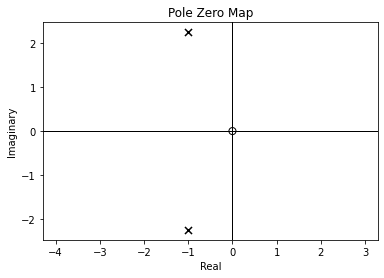

In [189]:
# Continuous
pzmap(sysc)

(array([-1.+2.23606798j, -1.-2.23606798j]), array([0.+0.j]))

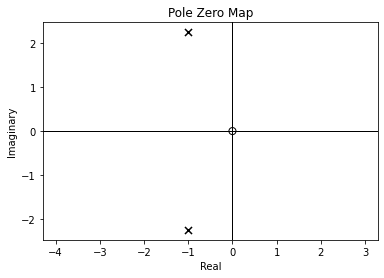

In [ ]:
# Discrete
pzmap(sysd)

##### Root Locus

(array([[-1.00000000e+00-2.23606798e+00j, -1.00000000e+00+2.23606798e+00j],
        [-1.10516859e+00-2.18600146e+00j, -1.10516859e+00+2.18600146e+00j],
        [-1.21033717e+00-2.12957365e+00j, -1.21033717e+00+2.12957365e+00j],
        [-1.31550576e+00-2.06626344e+00j, -1.31550576e+00+2.06626344e+00j],
        [-1.42067435e+00-1.99541585e+00j, -1.42067435e+00+1.99541585e+00j],
        [-1.52584293e+00-1.91619502e+00j, -1.52584293e+00+1.91619502e+00j],
        [-1.63101152e+00-1.82751236e+00j, -1.63101152e+00+1.82751236e+00j],
        [-1.73618011e+00-1.72791164e+00j, -1.73618011e+00+1.72791164e+00j],
        [-1.84134869e+00-1.61537456e+00j, -1.84134869e+00+1.61537456e+00j],
        [-1.94651728e+00-1.48696687e+00j, -1.94651728e+00+1.48696687e+00j],
        [-2.05168587e+00-1.33812746e+00j, -2.05168587e+00+1.33812746e+00j],
        [-2.15685446e+00-1.16102492e+00j, -2.15685446e+00+1.16102492e+00j],
        [-2.18314660e+00-1.11079742e+00j, -2.18314660e+00+1.11079742e+00j],
        [-2.

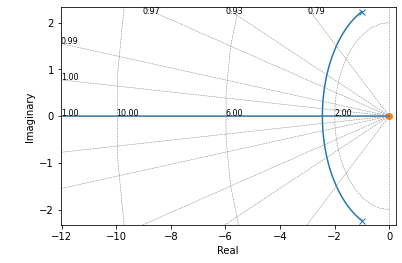

In [ ]:
# Continuous
root_locus(sysc)

(array([[-1.00000000e+00-2.23606798e+00j, -1.00000000e+00+2.23606798e+00j],
        [-1.10516859e+00-2.18600146e+00j, -1.10516859e+00+2.18600146e+00j],
        [-1.21033717e+00-2.12957365e+00j, -1.21033717e+00+2.12957365e+00j],
        [-1.31550576e+00-2.06626344e+00j, -1.31550576e+00+2.06626344e+00j],
        [-1.42067435e+00-1.99541585e+00j, -1.42067435e+00+1.99541585e+00j],
        [-1.52584293e+00-1.91619502e+00j, -1.52584293e+00+1.91619502e+00j],
        [-1.63101152e+00-1.82751236e+00j, -1.63101152e+00+1.82751236e+00j],
        [-1.73618011e+00-1.72791164e+00j, -1.73618011e+00+1.72791164e+00j],
        [-1.84134869e+00-1.61537456e+00j, -1.84134869e+00+1.61537456e+00j],
        [-1.94651728e+00-1.48696687e+00j, -1.94651728e+00+1.48696687e+00j],
        [-2.05168587e+00-1.33812746e+00j, -2.05168587e+00+1.33812746e+00j],
        [-2.15685446e+00-1.16102492e+00j, -2.15685446e+00+1.16102492e+00j],
        [-2.18314660e+00-1.11079742e+00j, -2.18314660e+00+1.11079742e+00j],
        [-2.

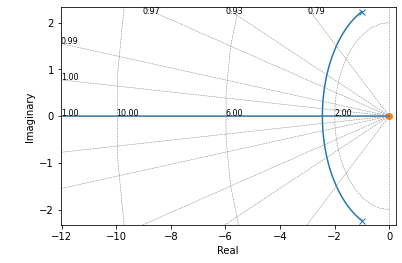

In [ ]:
# Discrete
root_locus(sysd)

##### Bode Plot

(array([0.01047657, 0.0120644 , 0.01389352, 0.01600095, 0.01842956,
        0.02122907, 0.02445735, 0.02818192, 0.03248188, 0.03745044,
        0.04319812, 0.04985714, 0.05758731, 0.0665843 , 0.07709136,
        0.08941621, 0.10395577, 0.12123253, 0.14194783, 0.16705752,
        0.19786952, 0.23613   , 0.28393701, 0.3428841 , 0.41071269,
        0.47322728, 0.49999296, 0.47166065, 0.40858837, 0.34090904,
        0.28230547, 0.23482276, 0.19682153, 0.16620847, 0.14125128,
        0.12065439, 0.10347113, 0.08900667, 0.07674307, 0.06628663,
        0.05733193, 0.04963739, 0.04300861, 0.03728672, 0.03234026,
        0.02805929, 0.0243511 , 0.02113695, 0.01834965, 0.01593163]),
 array([ 1.54984165,  1.54666519,  1.5430057 ,  1.53878895,  1.53392886,
         1.52832542,  1.5218621 ,  1.51440261,  1.50578679,  1.49582524,
         1.48429225,  1.47091607,  1.45536555,  1.43723096,  1.4159961 ,
         1.39099672,  1.36135697,  1.32589039,  1.28294183,  1.23013017,
         1.16392388,  1.07

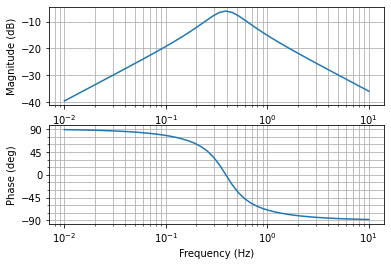

In [ ]:
# continuous
bode_plot(sysc)

(array([0.11121405, 0.1112476 , 0.11129209, 0.11135109, 0.11142936,
        0.1115332 , 0.11167101, 0.11185394, 0.11209689, 0.11241974,
        0.11284906, 0.11342056, 0.1141823 , 0.11519931, 0.11656009,
        0.11838588, 0.12084409, 0.12416766, 0.12868262, 0.13484475,
        0.14327802, 0.15477291, 0.1700827 , 0.18902881, 0.20814197,
        0.21876015, 0.21467288, 0.20381338]),
 array([0.03492304, 0.0402164 , 0.0463144 , 0.05334059, 0.06143809,
        0.07077312, 0.08153916, 0.09396224, 0.10830761, 0.12488836,
        0.1440768 , 0.16631989, 0.19216061, 0.2222684 , 0.25748341,
        0.2988827 , 0.34788165, 0.40639289, 0.47708137, 0.56378043,
        0.67217249, 0.81086251, 0.99281194, 1.23601622, 1.55840781,
        1.95787912, 2.39304496, 2.82022628]),
 array([  6.28318531,   7.23443066,   8.32969017,   9.59076694,
         11.04276494,  12.71458874,  14.63951898,  16.8558748 ,
         19.4077767 ,  22.34602481,  25.72911015,  29.62437906,
         34.10937376,  39.27337602, 

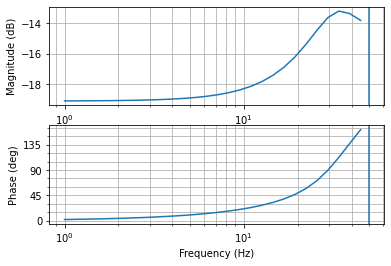

In [ ]:
# Discrete
bode_plot(sysd)

##### Nyquist Plot

(array([5.56791323e-04, 7.38678875e-04, 9.80214687e-04, 1.30113490e-03,
        1.72783848e-03, 2.29573665e-03, 3.05250550e-03, 4.06264314e-03,
        5.41394865e-03, 7.22689454e-03, 9.66846249e-03, 1.29730395e-02,
        1.74747747e-02, 2.36590021e-02, 3.22460681e-02, 4.43309631e-02,
        6.16185101e-02, 8.68133459e-02, 1.24209364e-01, 1.80269994e-01,
        2.62636154e-01, 3.71381451e-01, 4.73189543e-01, 4.94267699e-01,
        4.14066915e-01, 3.01177834e-01, 2.07843116e-01, 1.42705128e-01,
        9.91626129e-02, 6.99862552e-02, 5.01099840e-02, 3.63098526e-02,
        2.65608755e-02, 1.95729531e-02, 1.45051522e-02, 1.07958580e-02,
        8.06141372e-03, 6.03448823e-03, 4.52567227e-03, 3.39891715e-03,
        2.55542116e-03, 1.92280425e-03, 1.44767935e-03, 1.09045932e-03,
        8.21669787e-04, 6.19296921e-04, 4.66859658e-04, 3.51996644e-04,
        2.65423605e-04, 2.00160056e-04]),
 array([ 0.0166759 ,  0.019204  ,  0.02211666,  0.02547302,  0.02934167,
         0.03380234, 

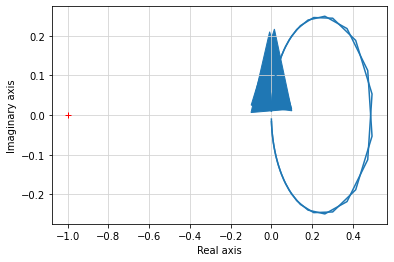

In [ ]:
# Continuous
nyquist_plot(sysc)

/usr/local/lib/python3.6/dist-packages/control/statesp.py:516: UserWarning: freqresp: frequency evaluation above Nyquist frequency
  warn("freqresp: frequency evaluation above Nyquist frequency")


(array([ 0.11119979,  0.11122847,  0.11126633,  0.11131623,  0.1113819 ,
         0.11146807,  0.11158073,  0.11172729,  0.11191656,  0.11215841,
         0.11246252,  0.11283528,  0.11327277,  0.11374524,  0.11416334,
         0.11430411,  0.11364664,  0.11100412,  0.10371828,  0.08610707,
         0.04786603, -0.02103818, -0.10786142, -0.17208453, -0.19763315,
        -0.19593194, -0.14317137,  0.0212831 ,  0.11085728,  0.11196967,
         0.11351281,  0.0592487 , -0.19306721, -0.06866962,  0.11300093,
         0.09917256, -0.19445349,  0.11257701, -0.13990312,  0.11413795,
        -0.19848733,  0.1135994 ,  0.11254319,  0.11190423,  0.11427091,
         0.11212794, -0.18426181,  0.1111208 ,  0.1105687 ,  0.11320043]),
 array([ 0.00619153,  0.00713592,  0.008227  ,  0.00948893,  0.01095057,
         0.01264678,  0.01462014,  0.01692349,  0.01962355,  0.02280633,
         0.02658518,  0.03111307,  0.03660169,  0.04335113,  0.05179628,
         0.0625777 ,  0.07664131,  0.09534044,  0

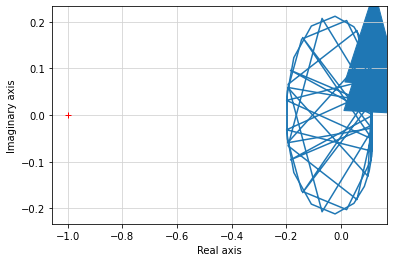

In [ ]:
# Discrete
nyquist_plot(sysd)

## Test the Systems Response

Actually, we can analyze the response of systems from two approach, first time domain approach, then frequency domain approach

#### Time Domain Approach

##### Step Response

In [ ]:
from control import step_response # Step Response function import

###### Python Control Function

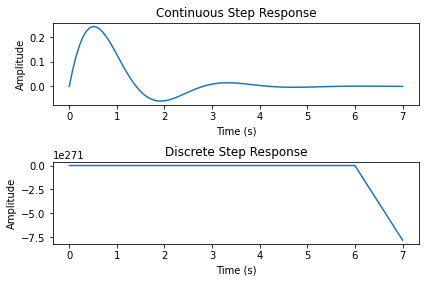

In [ ]:
# Continuous Time Systems
tc, yc = step_response(sysc)
plt.subplot(2,1,1)
plt.plot(tc,yc)
plt.title('Continuous Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Discrete Time Systems
td, yd = step_response(sysd)
plt.subplot(2,1,2)
plt.plot(td,yd)
plt.title('Discrete Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout(1)

###### MATLAB like function

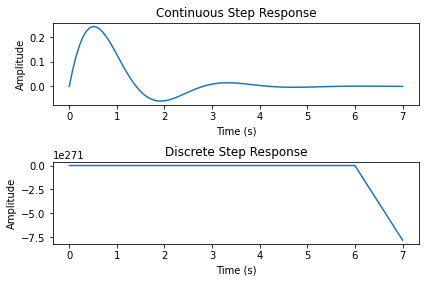

In [ ]:
# Continuous Time Systems
yc, tc = step(sysc)
plt.subplot(2,1,1)
plt.plot(tc,yc)
plt.title('Continuous Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Discrete Time Systems
yd, td = step(sysd)
plt.subplot(2,1,2)
plt.plot(td,yd)
plt.title('Discrete Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout(1)

##### Impulse Response

In [ ]:
from control import impulse_response # Impulse Response function import

###### Python Control Function

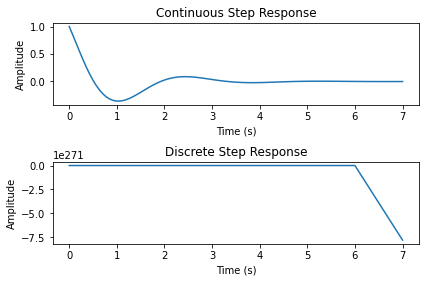

In [ ]:
# Continuous Time Systems
tc, yc = impulse_response(sysc)
plt.subplot(2,1,1)
plt.plot(tc,yc)
plt.title('Continuous Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Discrete Time Systems
td, yd = impulse_response(sysd)
plt.subplot(2,1,2)
plt.plot(td,yd)
plt.title('Discrete Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout(1)

###### MATLAB like Function

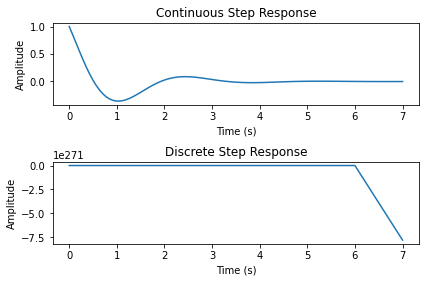

In [ ]:
# Continuous Time Systems
yc, tc = impulse(sysc)
plt.subplot(2,1,1)
plt.plot(tc,yc)
plt.title('Continuous Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Discrete Time Systems
yd, td = impulse(sysd)
plt.subplot(2,1,2)
plt.plot(td,yd)
plt.title('Discrete Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout(1)

#### Frequency Domain Approach

##### Frequency Response

In [ ]:
from control import freqresp

In [ ]:
# Continuous
freqresp(sysc, [10])

(array([[[0.10405382]]]), array([[[-1.36115648]]]), array([10]))

In [188]:
# Discrete
freqresp(sysd, [12])

(array([[[0.11148702]]]), array([[[0.06678141]]]), array([12]))

## Okay Then, Let's Simulate The Real World Systems!

In this ocassion, the design of the control algorithm were using MATLAB like function, so the code also compatible with MATLAB. In the case you want to try the simulation then it will be 100% worked both on Python and MATLAB.

### DC Motor Speed Control


![alt text](http://ctms.engin.umich.edu/CTMS/Content/MotorSpeed/System/Modeling/figures/motor.png)

Source : http://ctms.engin.umich.edu/CTMS/index.php?example=MotorSpeed&section=SystemModeling (CTMS, University of Michigan)

**The controlling aim for this system is to drive the DC motor speed into the desired speed by regulating a voltage to the motor.**

The system characteristics are continuous and linear in nature. This is because in this tutorial I only limit the system to Linear System.

As well, in this case the name for the controlling goal is tracking. Since, the goal of our control problem is to drive the DC motor speed to the desired speed.

In [ ]:
J = 0.08; # The motor moment of inertia
b = 0.05;
K = 0.01;
R = 0.5;
L = 0.5;
s = tf('s');
sys_tf = K/((J*s+b)*(L*s+R)+K**2)
# Also change the form of transfer function into state space model for controlling through the modern control algorithm
sys_ss = tf2ss(sys_tf)

(array([-0.9932104, -0.6317896]), array([], dtype=float64))

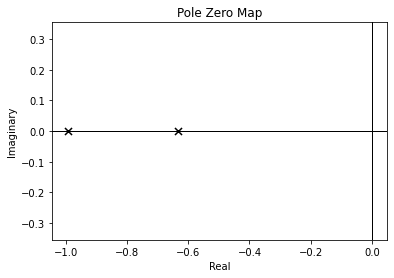

In [ ]:
## stability Checking
pzmap(sys_ss)

In [ ]:
# Stability Checking
eig = np.linalg.eig(sys_ss.A)
print('System Eigenvalue'),
print(eig[0], "\n"),

# Controllability Check
ctrM = ctrb(sys_ss.A, sys_ss.B)
rankCtr = np.linalg.matrix_rank(ctrM)
print('Controllability Rank'),
print(rankCtr, "\n"),

# Observabiity Check
obsM = obsv(sys_ss.A, sys_ss.C)
rankObs = np.linalg.matrix_rank(obsM)
print('Observability Rank'),
print(rankObs)

System Eigenvalue
[-0.9932104 -0.6317896] 

Controllability Rank
2 

Observability Rank
2


It's not stable due to pole or the eigenvalue located in right half plane (5.622). The system were controllable and observable because both of controllability and observability matrix have a full rank.

#### PID Controller

The equation of PID controller is denoted below,

\begin{align}
u(t) = K_p*e(t) + K_d*\frac{de(t)}{dt} + K_i * \int{e(t)} 
\end{align}

Where Kp, Ki, Kd, e(t) are proportional gain, integral gain, derivative gain, and system error, respectively.

If we want to write it as transfer function form then, 
\begin{align}
U(s)=K_p*E(s) + K_d * sE(s) + K_i * \frac{1}{s} * E(s) 
\end{align}

If we assume
\begin{align}
\tau_i = \frac{K_p}{K_i} ;
\tau_d = \frac{K_d}{K_p}
\end{align}

Thus, the final equation for the controller is,
\begin{align}
U(s) = K_p * E(s)(1 + s * \tau_d + \frac{1}{s*\tau_i})
\end{align}

In this test I select the gain arbitrary as follows, Kp = 160, Ki = 4, and Kd = 80. As well try to experiment with the other gain combination to see the effect of gain changing.



Text(0, 0.5, 'Motor Speed (RPM)')

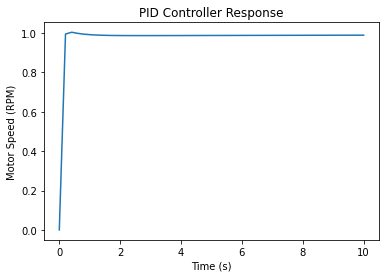

In [133]:
Kp = 160; # The proportional gain
Ki = 4; # The integral gain
Kd = 80; # The derivative gain
Ti = Kp / Ki
Td = Kd / Kp
pid = Kp * (1 + 1 / (Ti * s) + Td * s)
isys = feedback(sys_tf * pid, 1)
t = np.linspace(0, 10)
y, t = step(isys, t)
plt.plot(t, y)
plt.title('PID Controller Response')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')

#### State Feedback Controller (Pole Placement Method)

In this design, I would like to place all of the two pole to the left half plane coordinate and place it to specific pole location as this (-3, -4). You can also try the other combination to test how the system response change

Text(0, 0.5, 'Motor Speed (RPM)')

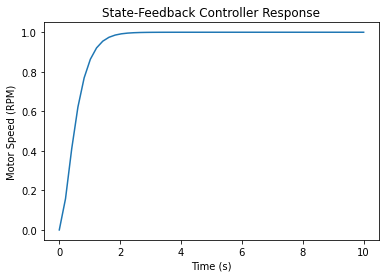

In [140]:
desiredPole = np.array([-3,-4])
ppGain = place(sys_ss.A, sys_ss.B, desiredPole)
feedbackMech = sys_ss.A - sys_ss.B * ppGain
newSys = ss(feedbackMech, sys_ss.B, sys_ss.C, 0)
t = np.linspace(0,10)
scaleSF = 1 / 0.02083333 # Because there are large steady state error we should a precompensator for scaling the reference signal
yref = 20*(np.sin(2*np.pi*t*0.1))
y, t = step(newSys * scaleSF, t)
plt.plot(t,y)
plt.title('State-Feedback Controller Response')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')

#### LQR Controller

LQR (Linear Quadratic Regulator) is the one of Optimal Control Algorithm variant, it uses calculus variation such as Algebraic Riccati Equation (ARE) to determine the optimal gain for the controller. 

Text(0, 0.5, 'Motor Speed (RPM)')

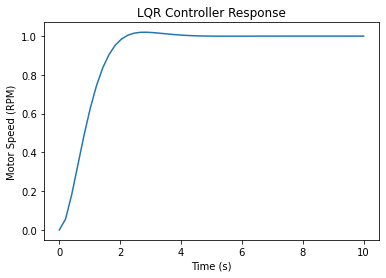

In [184]:
# Defining the LQR Parameter
Q = np.array([[0,0],
              [0,100]])
R = 10
gainLQR, X, E =  lqr(sys_ss.A, sys_ss.B, Q, R)
feedbackMech = sys_ss.A - sys_ss.B * gainLQR
newSysqr = ss(feedbackMech, sys_ss.B, sys_ss.C, 0)
t = np.linspace(0,10)
scaleLQR = 1 / 0.07754505 # Because there are large steady state error we should a precompensator for scaling the reference signal
y,t = step(newSysqr * scaleLQR, t)
plt.plot(t,y)
plt.title('LQR Controller Response')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')

#### Compare it Together

Before we can use the variations of reference signal such as square wave, sinusoidal signal, etc. We ought to import the forced_response function first from the Python Control Systems Library and the signal function from SciPy library

In [148]:
from control import forced_response
from scipy import signal

##### Step Speed Reference of 1200 RPM

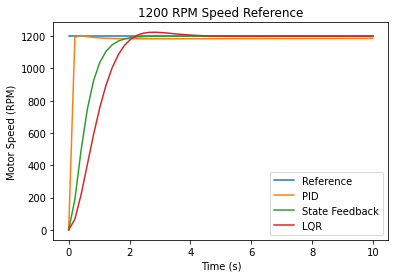

In [185]:
# The Step Signal with 1500 RPM amplitude
maxSim = 10 # The simulation time is 10 second
t = np.linspace(0, maxSim)
amp = 1200 # Because the reference signal is on 1500 RPM 
ref = amp *  np.ones(np.shape(t))
isys # The transfer function 
y1 = forced_response(isys, T = t, U = ref)
res1 = y1[1]
y2 = forced_response(newSys * scaleSF, T = t, U = ref)
res2 = y2[1]
y3 = forced_response(newSysqr * scaleLQR, T = t, U = ref)
res3 = y3[1]
plt.plot(t,ref)
plt.plot(t,res1)
plt.plot(t,res2)
plt.plot(t,res3)
plt.title('1200 RPM Speed Reference')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')
plt.legend(['Reference','PID', 'State Feedback','LQR'])

##### Sinusoidal Speed Reference 

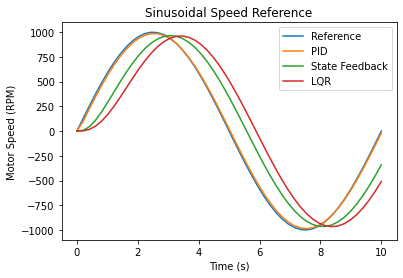

In [186]:
# The Sinusoidal Signal with 1000 RPM amplitude
maxSim = 10 # The simulation time is 10 second
t = np.linspace(0, maxSim)
amp = 1000 # Because the reference signal is on 1500 RPM
f = 0.1 # The sinusoidal signal frequency 
ref = amp *  np.sin(2 * np.pi * f * t)
isys # The transfer function 
y1 = forced_response(isys, T = t, U = ref)
res1 = y1[1]
y2 = forced_response(newSys * scaleSF, T = t, U = ref)
res2 = y2[1]
y3 = forced_response(newSysqr * scaleLQR, T = t, U = ref)
res3 = y3[1]
plt.plot(t,ref)
plt.plot(t,res1)
plt.plot(t,res2)
plt.plot(t,res3)
plt.title('Sinusoidal Speed Reference')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')
plt.legend(['Reference','PID', 'State Feedback','LQR'])

##### Square Speed Reference

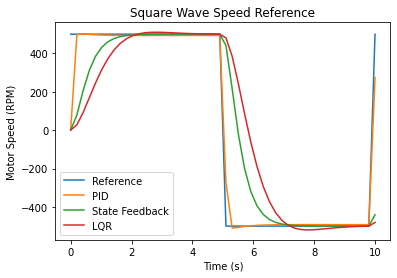

In [172]:
# The Square Signal with 500 RPM amplitude
maxSim = 10 # The simulation time is 10 second
t = np.linspace(0, maxSim, endpoint = True)
amp = 500 # Because the reference signal is on 500 RPM
f = 0.1 # The square signal frequency in Hz
ref = amp *  signal.square(2 * np.pi * f * t)
isys # The transfer function 
y1 = forced_response(isys, T = t, U = ref)
res1 = y1[1]
y2 = forced_response(newSys * scaleSF, T = t, U = ref)
res2 = y2[1]
y3 = forced_response(newSysqr * scaleLQR, T = t, U = ref)
res3 = y3[1]
plt.plot(t,ref)
plt.plot(t,res1)
plt.plot(t,res2)
plt.plot(t,res3)
plt.title('Square Wave Speed Reference')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')
plt.legend(['Reference','PID', 'State Feedback','LQR'])

##### Sawtooth Speed Reference

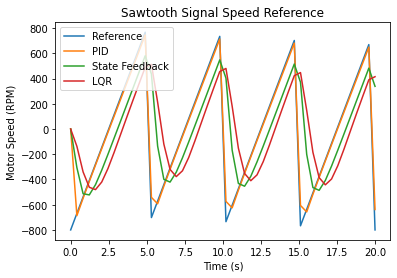

In [173]:
# The Sawtooth Signal with 800 RPM amplitude
maxSim = 20 # The simulation time is 20 second
t = np.linspace(0, maxSim)
amp = 800 # Because the reference signal is on 800 RPM
f = 0.2 # The sawtooth signal frequency 
ref = amp *  signal.sawtooth(2 * np.pi * f * t)
y1 = forced_response(isys, T = t, U = ref)
res1 = y1[1]
y2 = forced_response(newSys * scaleSF, T = t, U = ref)
res2 = y2[1]
y3 = forced_response(newSysqr * scaleLQR, T = t, U = ref)
res3 = y3[1]
plt.plot(t,ref)
plt.plot(t,res1)
plt.plot(t,res2)
plt.plot(t,res3)
plt.title('Sawtooth Signal Speed Reference')
plt.xlabel('Time (s)')
plt.ylabel('Motor Speed (RPM)')
plt.legend(['Reference','PID', 'State Feedback','LQR'])

# More Advanced Control Systems Design (Optional)

Coming Soon on V2
